## Breakthrough Listen: Voyager 1 Observations

[Voyager 1](https://en.wikipedia.org/wiki/Voyager_1) is the most distant man-made object from Earth. Launched by NASA in 1977, it has travelled at fantastic speed (roughly 17,000 m/s), past the outer boundaries of our Solar System and into interstellar space (>12.5 billion miles from the Sun).

Remarkably, 39 years on, Voyager 1 is still sending telemetry data from the depths of interstellar space. This makes it a great systems test for the Breakthrough Listen signal processing pipeline.

In this tutorial, we load, read, and plot some Breakthrough Listen (BL) observations of Voyager 1. The data were taken using the [Robert C. Byrd Greenbank Telescope](https://science.nrao.edu/facilities/gbt) in West Virginia.

### About this tutorial

This tutorial introduces you to BL filterbank data. It is intended for intermediate to advanced users, who have experience with Python, Numpy and basic astronomy. You'll need to have [Jupyter](http://www.jupyter.org) installed, along with a scientific Python installation (numpy, scipy, matplotlib, and [astropy](http://www.astropy.org)). You'll also need [blimpy](https://github.com/ucberkeleyseti/blimpy) to read and manipulate the data.


### About the data

We used the Greenbank X-band receiver (8.0-11.6 GHz) on December 30, 2015, to observe the known position of Voyager 1. The BL digital signal processing system saves digitized data in a 'raw' format, which we have converted into 'filterbank' format using our `gpuspec` code (see guppi2spectra.c in https://github.com/UCBerkeleySETI/gbt_seti/tree/master/src ). For *advanced users* who want to start from scratch, the specific command is:

```
time /gbt_seti/bin/gpuspec -i ./blc3_2bit_guppi_57386_VOYAGER1_0004.0000.raw \
    -B 2 -f 1032192 -t 15 -V -o /datax2/scratch/dprice/
```

For the purposes of this tutorial, we suggest that you download the 50 MB [Voyager1.single_coarse.fine_res.h5](http://blpd0.ssl.berkeley.edu/Voyager_data/Voyager1.single_coarse.fine_res.h5) consisting of a subset of frequencies (corresponding to a single coarse channel) in the blimpy github distribution.

#### Filterbank format 

The voyager data is stored in *filterbank format*, a simple binary file format that is detailed in the [SIGPROC user guide](http://sigproc.sourceforge.net/sigproc.pdf). For this tutorial, we've provided a simple Python class to load and interpret the filterbank file into a [numpy](http://www.numpy.org) array. 

## Let's get started!

If you haven't downloaded the data yet, please do so with [this link](https://github.com/UCBerkeleySETI/blimpy/blob/master/tests/Voyager_data/Voyager1.single_coarse.fine_res.fil), or this wget command:

In [3]:
!wget http://blpd0.ssl.berkeley.edu/Voyager_data/Voyager1.single_coarse.fine_res.h5

--2019-08-26 13:53:51--  http://blpd0.ssl.berkeley.edu/Voyager_data/Voyager1.single_coarse.fine_res.h5
Resolving blpd0.ssl.berkeley.edu... 208.68.240.101
Connecting to blpd0.ssl.berkeley.edu|208.68.240.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50549227 (48M) [application/octet-stream]
Saving to: 'Voyager1.single_coarse.fine_res.h5'

Voyager1.single_coa 100%[===================>]  48.21M  1.81MB/s    in 24s     

2019-08-26 13:54:17 (2.01 MB/s) - 'Voyager1.single_coarse.fine_res.h5' saved [50549227/50549227]



Firstly, let's setup the notebook and import the `Waterfall()` class to read the data.

In [1]:
%matplotlib inline

In [2]:
import pylab as plt
from blimpy import Waterfall

Now, let's read the observation data using `Waterfall()`:

In [5]:
file_path = 'Voyager1.single_coarse.fine_res.h5'
obs = Waterfall(file_path)

We can get basic info about the file by reading the filterbank header. The `info()` method will do this:

In [6]:
obs.info()


--- File Info ---
'DIMENSION_LABELS' : ['frequency' 'feed_id' 'time']
 'telescope_id' :                                6
  'rawdatafile' : 'guppi_57650_67573_Voyager1_0002.0000.raw'
  'source_name' :                      'Voyager1'
   tstart (ISOT) :          2016-09-19T18:46:13.000
    tstart (MJD) :                57650.78209490741
    'data_type' :                                1
       'nchans' :                          1048576
        'ibeam' :                                1
        'tsamp' :                     18.253611008
         'foff' :          -2.7939677238464355e-06
      'src_raj' :                    17h10m03.984s
      'src_dej' :                      12d10m58.8s
       'nbeams' :                                1
     'az_start' :                              0.0
         'fch1' :                8421.386717353016
     'za_start' :                              0.0
   'machine_id' :                               20
         'nifs' :                                1


The specifics are discussed in the detailed in the [SIGPROC user guide](http://sigproc.sourceforge.net/sigproc.pdf). Briefly, astronomers use a Celestial coordinate system to specify the location of objects in outer space. The `src_raj` and `src_dej` specify the [J2000](https://en.wikipedia.org/wiki/Epoch_%28astronomy%29#Julian_years_and_J2000) coordinates, in terms of Right Ascension and Declination (RA & DEC), toward which the telescope is pointing. `tstart` specifies the [Julian Date](https://en.wikipedia.org/wiki/Julian_day) of the observation, and `fch1` and `foff` specify the frequency of the first and frequency increment of each data channel respectively, in MHz. 


We can also look directly at the header and data, which are stored as objects in the `Waterfall()` class:

In [8]:
print(obs.header)
print(obs.data.shape)

{'DIMENSION_LABELS': array(['frequency', 'feed_id', 'time'], dtype=object), 'telescope_id': 6, 'rawdatafile': 'guppi_57650_67573_Voyager1_0002.0000.raw', 'source_name': 'Voyager1', 'tstart': 57650.78209490741, 'data_type': 1, 'nchans': 1048576, 'ibeam': 1, 'tsamp': 18.253611008, 'foff': -2.7939677238464355e-06, 'src_raj': <Angle 17.16777333 hourangle>, 'src_dej': <Angle 12.183 deg>, 'nbeams': 1, 'az_start': 0.0, 'fch1': 8421.386717353016, 'za_start': 0.0, 'machine_id': 20, 'nifs': 1, 'nbits': 32}
(16, 1, 1048576)


The data has the shape (16, 1, 1048576), meaning that is has 16 time integrations, and 1048576 channels, over a bandwidth of 2.9 MHz. For the record, that's a lot of channels! The corresponding channel bandwidth is far narrower (Hz) than that required for most astrophysical observations (kHz).

### Plotting the data

The `Waterfall()` class provides a `plot_spectrum()` function to plot the data:

extracting integration 0...


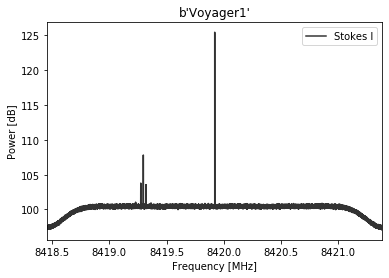

In [10]:
obs.plot_spectrum(logged=True)

What we see here is the power spectral density (or simply "spectrum") of the data contained in the filterbank file.  The `logged=True` tells the plotting script to display the signal on a decibel scale, which makes it easier to see high dynamic range. 

Apparent in the plot are the edges of the digital filters, and a big spike in power in the centre. This is known as the 'DC bin', and is an artifact caused by the use of the Fast Fourier Transform (FFT) to create spectra. 

Voyager is a very narrowband signal, but we can still see it to the left of this plot. If we zoom in on where Voyager's telemetry is known to be, we see some very narrowband signals:

extracting integration 0...


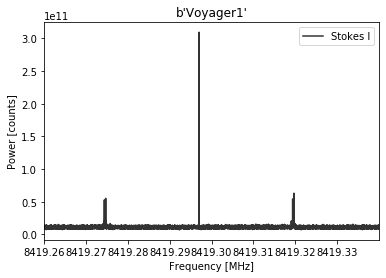

In [15]:
obs.plot_spectrum(f_start=8419.26, f_stop=8419.34)

This is it: the telemetry signal from Voyager 1! What you see is the carrier (center) and two sidebands that carry the data. We can zoom in on these to see more features:

extracting integration 0...
extracting integration 0...
extracting integration 0...


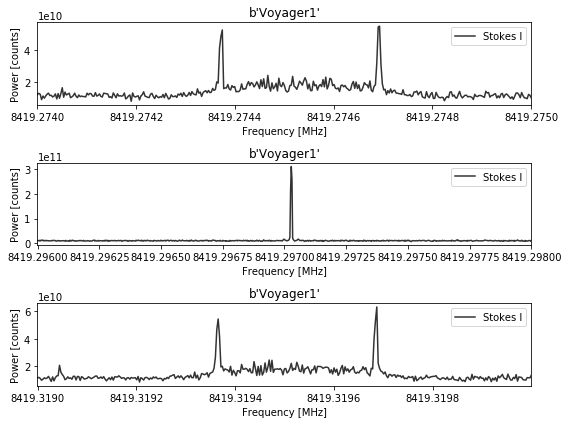

In [23]:
plt.figure(figsize=(8, 6))
plt.subplot(3,1,1)
obs.plot_spectrum(f_start=8419.274, f_stop=8419.275) # left sideband
plt.subplot(3,1,2)
obs.plot_spectrum(f_start=8419.296, f_stop=8419.298) # carrier
plt.subplot(3,1,3)
obs.plot_spectrum(f_start=8419.319, f_stop=8419.320) # right sideband
plt.tight_layout()

Because Voyager is not fixed on the surface of Earth, it has a relative motion with respect to the telescope, which causes its apparent frequency to drift. We can see this by plotting what's known as a 'Waterfall', or dynamic spectrum, which shows the spectrum as a function of time.

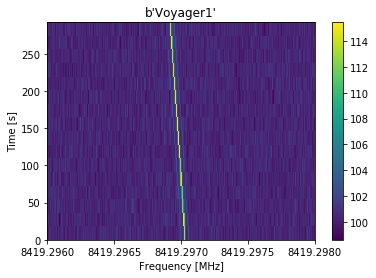

In [26]:
obs.plot_waterfall(f_start=8419.296, f_stop=8419.298)

In this plot, the two axes are frequency channel and time, and the color corresponds to power level. This doppler drift needs to be accounted for when NASA communicates with the spacecraft. Likewise, when Breakthrough Listen is searching for SETI signals, we need to search for different doppler drift rates to maximize signal-to-noise.


### Discussion

If you've gotten this far, taken a moment to pause and reflect. This faint signal has travelled billions of miles through space, back to us here on Earth. Launching this probe out of the Solar System was an immense feat, and the fact that we can detect it still, almost 40 years after its launch, is even more impressive.

The signals from probes such as Voyager are very different from the signals we measure from astrophysical objects. This is one of the approaches Breakthrough Listen is using in its approach toward detecting extraterrestrial signals.